<a href="https://colab.research.google.com/github/Tha-Helena/Churn_Prediction/blob/main/Projeto_04_Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Churn Prediction



Numa abordagem mais ampla, o *churn* é uma métrica que revela quantos clientes cancelam um serviço dentro de um período específico.

A taxa de *churn* tem um impacto negativo na receita de uma empresa. Portanto, compreender esse indicador e adotar medidas para diminuir é crucial para o sucesso de muitos negócios. Com o crescimento dos modelos de negócios por assinatura, como Spotify ou Netflix, a evasão (ou índice de cancelamento de clientes) tornou-se mais reconhecida (Adaptado de Resultados Digitais).

Perder um cliente não implica apenas deixar de receber o valor do contrato, mas também perder todas as possíveis oportunidades de negócios e recomendações boca a boca que poderiam surgir.


<p align=center>
<img src="https://www.pinclipart.com/picdir/big/171-1716993_since-b2c-companies-will-at-times-provide-a.png" width="60%"></p>


Além disso, uma receita reduzida com a mesma infraestrutura significa, em geral, um aumento nos custos fixos para os demais contratantes e, consequentemente, uma diminuição nos lucros obtidos.

Isso ressalta a extrema importância dessa métrica para a administração. Sua análise ao longo do tempo pode revelar problemas que precisam ser abordados. Além disso, é crucial observar que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto do que o custo de mantê-los. Ou seja, uma alta taxa de evasão é algo indesejável.

O *churn* também pode ser utilizada para identificar possíveis cancelamentos com antecedência. Este projeto usará dados anônimos de uma empresa de telecomunicações para desenvolver um modelo de *machine learning* que busca prever, com alta precisão, a probabilidade de cancelamento de determinado cliente. Dessa forma, a empresa poderia implementar ações direcionadas para tentar reter esses clientes, reduzindo assim a taxa de evasão.


## Análise dos Dados

Vamos começar com um dicionário para facilitar o entendimento dos dados usados na análise

**Dicionário das variáveis**

* `CustomerID` - Código de identificação do cliente
* `Gender` - gênero: Male (Homem), Famale (Mulher)
* `SeniorCitizen` - Indica se o cliente é idoso: Sim (1), Não (2)
* `Partner` - Possui algum parceiro(a)
* `Dependents` - Possui dependentes
* `Tenure` - Preríodo que o cliente tem contrato com a empresa  
* `PhoneService` - Possui serviço de telefonia
* `MultipleLines` - Possui várias linhas de telefone
* `InternetService` - Possui serviço de internet
* `OnlineSecurity` - Possui serviço de segurança online
* `OnlineBackup` - Possui serviço de backup online
* `DeviceProtection` - Possui serviço de proteção ao equipamento
* `TechSupport` - Serviço de suporte técnico
* `StreamingTV` - Possui serviço de Streaming para a TV
* `StreamingMovies` - Possui serviço de Streaming para filmes
* `Contract` - Tipo de contrato (mensal, anual ou dois anos)
* `PaperlessBilling` - Fatura online
* `PaymentMethod` - Forma de pagamento
* `MonthlyCharges` - Valor mensal
* `TotalCharges` - Valor total durante todo o período de contrato do cliente
* `Churn` - O contrato foi cancelado


## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

## Análise Exploratória dos Dados

Vamos importar os pacotes necessários e iniciar a Análise Exploratória.

E para facilitar a aquisição dos dados, vamos importar um link com acesso direto ao csv. Com isso, basta importar o conjunto de dados usando o método pd.read_csv().

In [ ]:
# Instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [ ]:
# Import warnings filter
from warnings import simplefilter
# Ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Random seed
np.random.seed(28)

# Importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)



Antes de iniciar qualquer análise, vamos verificar as informações que temos nosso *dataset* (conjunto de dados), analisando as 5 primeiras e as 5 últimas entradas para entender como ele está composto.

In [ ]:
# Visualizando as 5 primeiras linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Visualizando as 5 últimas linhas
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# Verificando tamanho do dataset
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Linhas:		7043
Colunas:	21


Podemos verificar que o dataset é composto de 7043 entradas e 21 variáveis (Colunas).

Agora vamos verificar algumas informações do nosso *dataset*

* Dados ausente
* Nomes das colunas (features)
* Valores únicos
* Tipos de variáveis

Esses dados vão ajudar na identificação das variáveis potencialmente categóricas.

In [ ]:
# Verificando dados ausentes
print("Dados ausentes (total):\t{}\n".format(df.isnull().sum().values.sum()))
print(df.isnull().sum() / df.shape[0])

Dados ausentes (total):	0

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [ ]:
# Verificando nomes das colunas (fearures)
print("\nNomes das features:\n{}\n".format(df.columns.values))


Nomes das features:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']



In [ ]:
# Verificando valores únicos por coluna
print("Valores únicos (por coluna):\n{}\n".format(df.nunique()))

Valores únicos (por coluna):
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64



In [ ]:
# Verificando tipos de variáveis
print("Tipos de Variáveis (por coluna)\n{}".format(df.dtypes))

Tipos de Variáveis (por coluna)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Analisando os dados acima, podemos verificar que:

* Não foi identificado nenhum dado ausente.
* A coluna `costumerID` não agrega nenhum valor na análise, se trata de apenas de uma identificação do cliente.
* A variável alvo está na coluna `churn`, indicando a situação do contrato do serviço assinado.
* A coluna `TotalCharges` deveria ser `float`, mas está como `object`.
* Algumas colunas precisam ser codificadas para valores numéricos.

Mas à frente iremos ver que mesmo não termos detectado dados ausentes, existem sim algumas strings com valores ausentes.


Vamos começar a investigar os daos da coluna `TotalCharges`.

In [ ]:
# Verificando o tipo de dados da coluna "TotalCharges"
print("Menor valor da coluna 'TotalCharges': {}".format(df['TotalCharges'].min()))
print("Maior valor da coluna'TotalCharges': {}".format(df['TotalCharges'].max()))

Menor valor da coluna 'TotalCharges':  
Maior valor da coluna'TotalCharges': 999.9


Podemos ver que o menor valor da coluna é apenas um espaço em branco ente aspas " ". Para corrigir, vamos criar uma função para facilitar a transformação das colunas na mesma situação.

In [ ]:
# Criando função para transformar a coluna TotalCharges em float
def converter_str_float(entrada):
  try:
    return float(entrada)
  except ValueError:
    return np.nan


Antes de aplicar a função criada acima, vamos fazer uma cópia do dataframe para preservar o conjunto de dados original e ai sim iniciar o tratamento necessário no conjunto de dados.

In [ ]:
# Criando uma cópia
df_clean = df.copy()

# Removendo a coluna costumerID
df_clean.drop("customerID", axis=1, inplace=True)

# Convertendo a coluna TotalCharges em float
df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(converter_str_float)

Agora que fizemos a transformação da coluna, vamos verificar a quantidade de entradas ausentes e depois substituir esses valores pelo valor médio da coluna.

In [ ]:
# Verificando entradas ausentes
df_clean["TotalCharges"].isnull().sum()

11

In [ ]:
# Substituindo os dados ausentes pela mediada (valor médio da coluna)
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

# Verificando entradas ausentes após substituir os dados pela mediana
df_clean["TotalCharges"].isnull().sum()

0

Como podemos ver acima, agora não temos nenhuma entrada ausente.

Embora a maior parte deste conjunto de dados seja composta principalmente por variáveis binárias ou categóricas, é notável, ao observarmos o resultado do método `describe`, que não há evidências da presença de outliers.

In [ ]:
# Agora teremos uma visão estatística através do método describe

df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Configurando as cores que usarei nas plotagens dos gráfico

AZUL = "#446491"
AZUL_ESCURO = "#2C415E"
AZUL_CLARO = "#7EA6DE"
CINZA = "#9EA9B7"

Ao examinar o gráfico boxplot das colunas `MonthlyCharges` e `TotalCharges`, é possível notar como a distribuição dos valores confirma essa suposição. O valor limite padrão não indicou a presença de nenhum ponto fora dos limites superior e inferior.

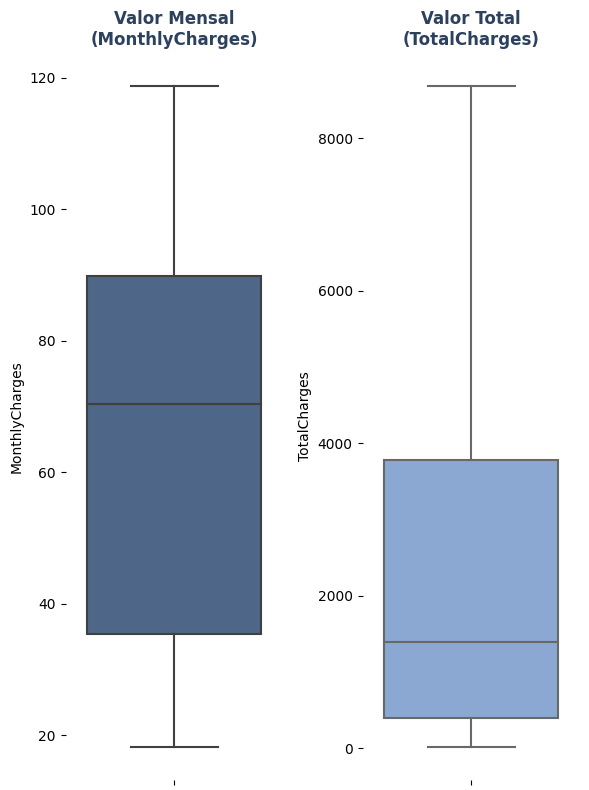

In [ ]:
# Criando a figura com duas subtramas (uma linha e duas colunas)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 8))

# Removendo as Spines
sns.despine(top=True, right=True, left=True, bottom=True)

# Gráfico 01 MonthlyCharges (na vertical)
sns.boxplot(data=df_clean, y='MonthlyCharges', ax=ax[0], color=AZUL)
ax[0].set_title('Valor Mensal\n(MonthlyCharges)', fontsize=12, color=AZUL_ESCURO, fontweight='bold')

# Gráfico 02 TotalCharges (na vertical)
sns.boxplot(data=df_clean, y='TotalCharges', ax=ax[1], color=AZUL_CLARO)
ax[1].set_title('Valor Total\n(TotalCharges)', fontsize=12, color=AZUL_ESCURO, fontweight='bold')

# Ajustando o layout para evitar sobreposição de rótulos
plt.tight_layout()

plt.show()

A variável `tenure` está associada à duração que um cliente mantém uma assinatura de um serviço específico. Em outras palavras, pode-se considerá-la como um indicador de lealdade. Embora não haja documentação explícita, é minha suposição que a unidade de tempo utilizada seja o 'mês'.

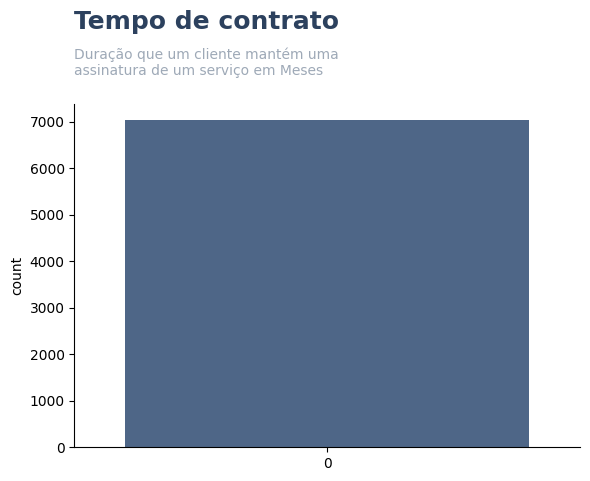

In [ ]:
# Plotando o gráfico de barras
fig, ax = plt.subplots(figsize=(6, 5))

sns.countplot(df_clean['tenure'],color=AZUL)

# Removendo spines da direita, esquerda e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Configurando o título
plt.text(-0.5, 9000,'Tempo de contrato', fontsize=18, color=AZUL_ESCURO, fontweight='bold')
plt.text(-0.5, 8000,'Duração que um cliente mantém uma\nassinatura de um serviço em Meses', fontsize=10, color=CINZA)

# Ajustando o layout para evitar sobreposição de rótulos
plt.tight_layout()

plt.show()

Quando se trata de lidar com variáveis categóricas, é crucial examinar os valores únicos. Isso ajuda a identificar situações em que diferentes rótulos podem estar indicando a mesma informação.

No entanto, neste contexto específico, optei por considerar cada rótulo de forma individual.


In [ ]:
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

Ao criar os gráficos acima, é evidente que o dataframe não apresenta *outliers*, o que nos permite prosseguir para a próxima fase da análise, na qual examinaremos o equilíbrio da variável alvo `Churn`.

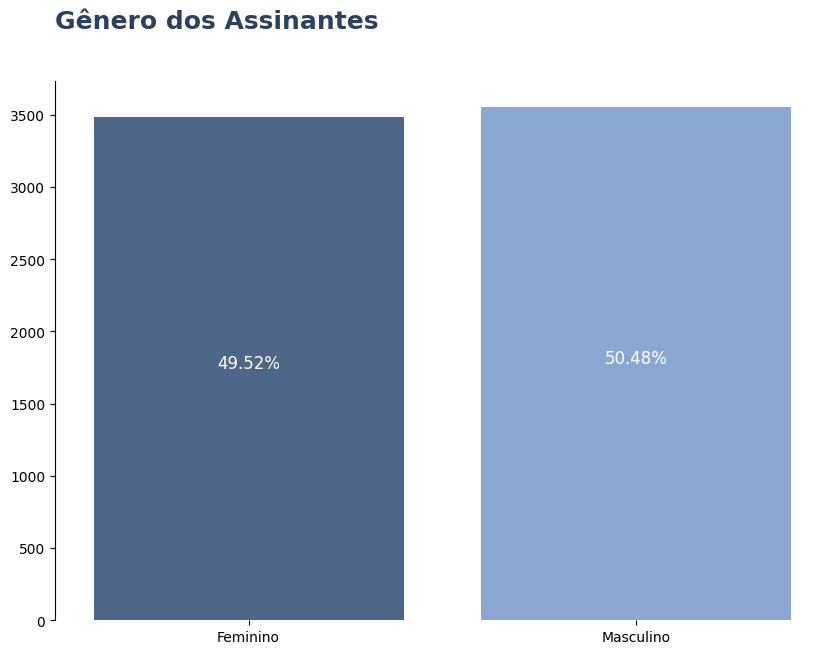

In [ ]:
# Criando Paleta de cores
paleta_cores = {'Female': '#446491', 'Male': '#7EA6DE'}

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(10, 7))

# Retirando as Spines
sns.despine(top=True, right=True, bottom=True)

# Plotando com a paleta de cores personalizada
sns.countplot(x=df_clean.gender, palette=paleta_cores, ax=ax)

# Configurando o plot
plt.text(-0.5, 4100,'Gênero dos Assinantes', fontsize=18, color=AZUL_ESCURO, fontweight='bold')
ax.set(xlabel=None)
ax.set(ylabel=None)

# Inserindo a porcentagem de cada observação dentro do plot
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() / df_clean.shape[0] * 100), (p.get_x() + 0.32, p.get_height() / 2), color='#FFFFFF', fontsize=12)

# Alterando os rótulos das barras
rótulos_personalizados = ['Feminino', 'Masculino']
ax.set_xticklabels(rótulos_personalizados)

# Exibindo
plt.show()

É perceptível que existe um equilíbrio entre os gêneros nas entradas.

* `FAMALE` (Feminino) - 49,52%
* `MALE` (Masculino) - 50,48%

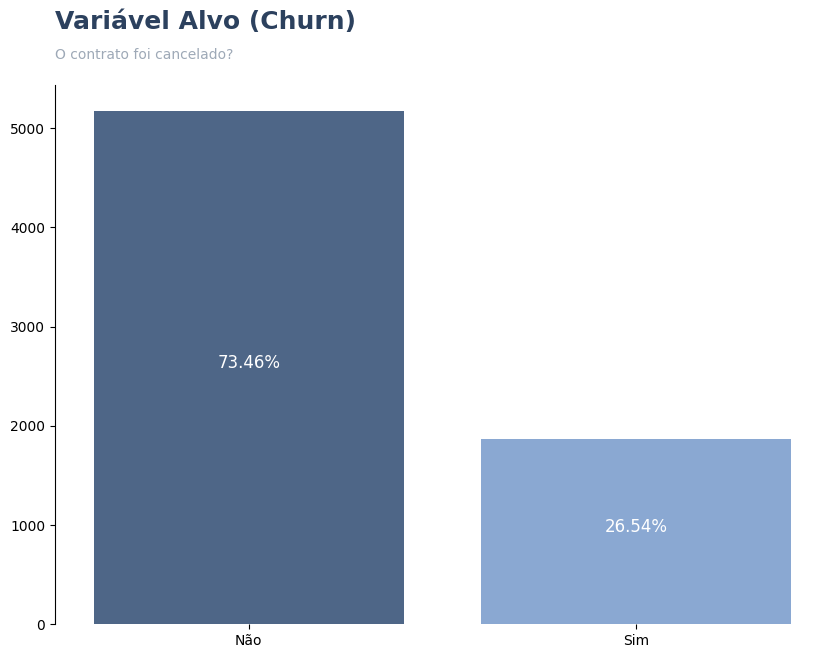

In [ ]:
# Criando Paleta de cores
paleta_cores = {'No': '#446491', 'Yes': '#7EA6DE'}

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(10, 7))

# Retirando as Spines
sns.despine(top=True, right=True, bottom=True)

# Plotando com a paleta de cores personalizada
sns.countplot(x=df_clean.Churn, palette=paleta_cores, ax=ax)

# Configurando o plot
plt.text(-0.5, 6000,'Variável Alvo (Churn)', fontsize=18, color=AZUL_ESCURO, fontweight='bold')
plt.text(-0.5, 5700,'O contrato foi cancelado?', fontsize=10, color=CINZA)
ax.set(xlabel=None)
ax.set(ylabel=None)

# Inserindo a porcentagem de cada observação dentro do plot
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() / df_clean.shape[0] * 100), (p.get_x() + 0.32, p.get_height() / 2), color='#FFFFFF', fontsize=12)

# Alterando os rótulos das barras
rótulos_personalizados = ['Não', 'Sim']
ax.set_xticklabels(rótulos_personalizados)

# Exibindo
plt.show()

Pode-se observar que a classe 'No' ocorre com uma frequência significativamente maior do que a classe 'Yes'.

* `NO` (Não) - 73,46%
* `YES` (Sim) - 26,54%

Essa discrepância será levada em consideração durante a fase de desenvolvimento do modelo de aprendizado de máquina.

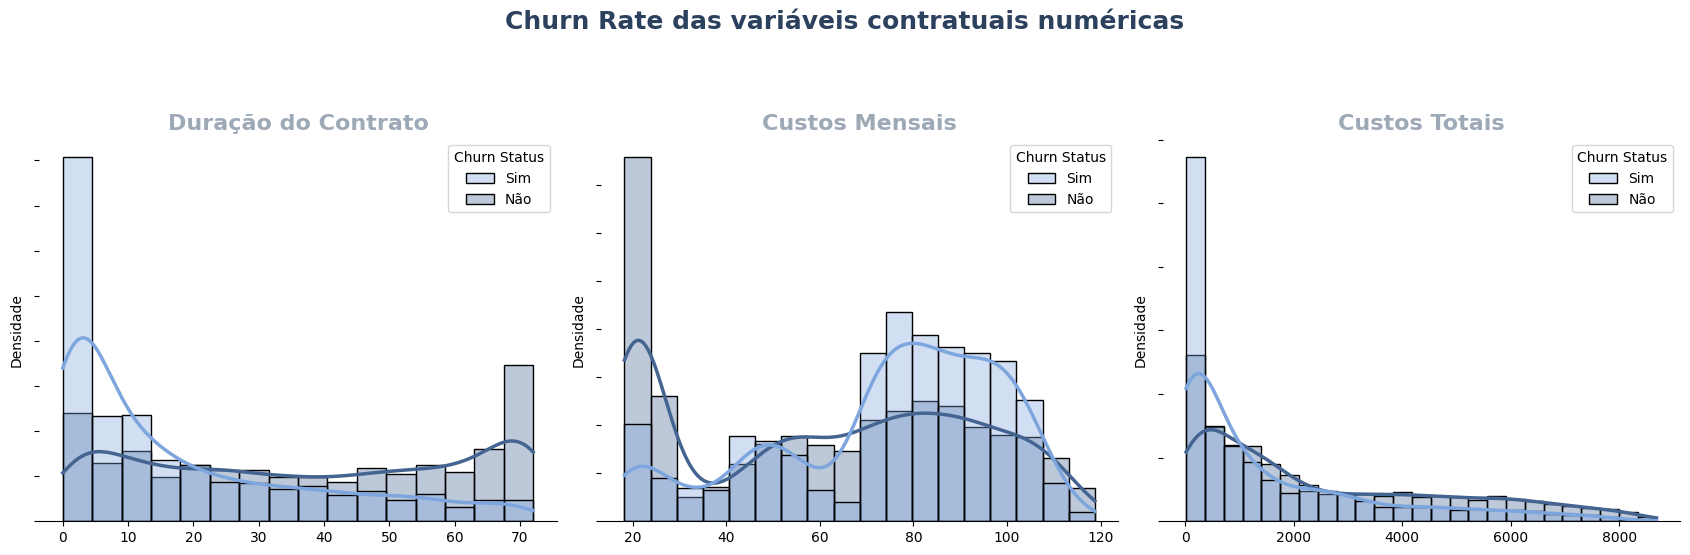

In [ ]:
# Definindo uma paleta de cores personalizada com cores diferentes para 'Yes' e 'No'
paleta_cores = {'No': '#446491', 'Yes': '#7EA6DE'}

# Criando a figura com subplots
fig, ax = plt.subplots(ncols=3, figsize=(17, 5))
st = fig.suptitle("Churn Rate das variáveis contratuais numéricas",
                  fontsize=18,
                  color=AZUL_ESCURO,
                  fontweight='bold',
                  y=1.1)

# Variáveis a serem plotadas
variaveis = ["tenure", "MonthlyCharges", "TotalCharges"]
rotulos_personalizados = ["Duração do Contrato", "Custos Mensais", "Custos Totais"]  # Rótulos personalizados

for i, variavel in enumerate(variaveis):
    # PloPlotando o histograma
    sns.histplot(data=df_clean,
                 x=variavel,
                 hue="Churn",
                 hue_order=["Yes", "No"],
                 ax=ax[i],
                 palette=paleta_cores,
                 kde=True,
                 stat="density",
                 multiple="layer",
                 common_norm=False,
                 alpha=0.35,
                 line_kws={'linewidth': 2.5})

    # Removendo as Spines
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)

    # Configurando o plot
    ax[i].set_title(rotulos_personalizados[i],  # Use o rótulo personalizado
                    fontsize=16,
                    fontweight='semibold',
                    color=CINZA)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel("Densidade")  # Rótulo do eixo y personalizado
    ax[i].set_yticklabels([])
    ax[i].tick_params(rotation='auto')

     # Personalizando a legenda
    legenda = ax[i].get_legend()
    legenda.set_title("Churn Status")
    for texto in legenda.texts:
        if texto.get_text() == "No":
            texto.set_text("Não")
        elif texto.get_text() == "Yes":
            texto.set_text("Sim")

# Exibindo
plt.tight_layout()
plt.show()

A análise das variáveis contratuais numéricas foi realizada de uma maneira um tanto diferente, utilizando histogramas para representar a proporção das observações `Yes` e `No` em relação aos diferentes valores numéricos que cada variável contratual *(tenure, MonthlyCharges e TotalCharges)* pode assumir.

Como resultado, identificamos o seguinte:

* Clientes com contratos recentes, com duração de até 20 meses, demonstram uma alta taxa de cancelamento, com destaque para aqueles que assinaram contratos com menos de 5 meses. No entanto, essa tendência se inverte quando o tempo de contrato ultrapassa 30 meses, indicando uma crescente fidelidade à medida que a duração do contrato aumenta.

* Notamos uma zona de alto índice de cancelamento para clientes com faturas mensais entre 75 e 105 dólares. Por outro lado, essa tendência se inverte em faixas de faturas entre 20 e 25 dólares, 55 e 65 dólares, e 110 e 120 dólares mensais.

Com isso, concluímos nossa análise das variáveis, obtendo informações valiosas que aprimorarão nossa compreensão dos dados em questão e nos auxiliarão na construção do modelo.



## Preparar os Dados

Durante esta fase de preparação dos dados, realizaremos um pré-processamento básico com o único propósito de construir um modelo inicial.

As características que possuíam apenas dois rótulos únicos serão processadas utilizando o `LabelEncoder`, incluindo a variável alvo `Churn`. Em seguida, separaremos as variáveis numéricas das categóricas. As variáveis categóricas serão convertidas em variáveis dummy, a fim de permitir sua utilização em todos os modelos.

In [ ]:
# Pré processar as variáveis
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

# Criando uma cópia do dataframe
df_proc = df_clean.copy()

# Label Encoding para as variáveis Binárias
le = LabelEncoder()
for i in binary_var:
    df_proc[i] = le.fit_transform(df_proc[i])

# Encoding para colunas categóricas com múltiplas classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

# Ver as 5 primeiras entradas do novo dataframe
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
# Conferindo as informações de "Churn"
df_proc.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

## Modelo de Machine Learning

Com o processamento concluído na etapa anterior, os dados estão prontos para serem empregados nos modelos de aprendizado de máquina.

Para possibilitar a comparação de desempenho e aprimoramento do modelo, vamos criar um baseline simples. Nessa etapa, não realizaremos ajustes nos hiperparâmetros, nem consideraremos o balanceamento de dados, engenharia de recursos ou seleção de características (entre outros).

No entanto, é crucial, desde já, separar os dados que serão utilizados para treinamento e teste. Os dados de teste serão reservados exclusivamente para a última fase do projeto, a fim de garantir uma avaliação mais precisa.

In [ ]:
# Separando a feature matrix da target vector
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']

# Dividindo os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

Vou empregar a validação cruzada para estimar o erro tanto da linha de base quanto dos modelos iniciais. Para simplificar e otimizar o código, desenvolvemos uma função denominada `val_model`. A métrica selecionada para avaliação é o `recall`.

In [ ]:
# Avaliando um modelo de machine learning
def val_model(X, y, clf, quite=False):

    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))

    return scores.mean()

Para o modelo baseline inicial, utilizarei o Random Forest, sem qualquer modificação nos parâmetros. Os dados que serão usados pertencem ao conjunto de treinamento.

In [ ]:
# Criando baseline e ver desempenho
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.50 (+/- 0.05)


Uma vez que estabelecemos um baseline para comparação e para avaliar se os ajustes melhoram ou prejudicam o desempenho do modelo, procederei com o balanceamento dos dados e avaliarei seu impacto. Optei pela técnica de *Under Sampling* após realizar testes de desempenho de outras técnicas.

Conforme recomendações de diversas fontes, os dados serão padronizados antes de aplicar essa técnica de balanceamento. Lembre-se de que o balanceamento será realizado exclusivamente nos dados de treinamento, mantendo os dados de teste inalterados.

In [ ]:
# Padronizando os  dados,
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

Realizarei a validação cruzada em vários modelos para avaliar seu desempenho e selecionar o(s) melhor(es). Novamente, os dados de treinamento serão os únicos utilizados. Os modelos escolhidos foram:

* Random Forest
* Decision Tree
* Stochastic Gradient Descent
* SVC
* Regressão Logística
* LightGBM

In [ ]:
# Instanciando os modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []

# Avaliando o desempenho (recall)
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

[LightGBM] [Info] Number of positive: 1140, number of negative: 1140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 2280, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1140, number of negative: 1140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 2280, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[L

,Recall
RandomForestClassifier,0.764211
DecisionTreeClassifier,0.682807
SGDClassifier,0.718596
SVC,0.791579
LogisticRegression,0.801404
XGBClassifier,0.761404
LGBMClassifier,0.770526


Dadas as características do problema e o desempenho observado nas execuções anteriores, optei por utilizar o algoritmo XGBoost.

Minha compreensão é que a otimização dos parâmetros pode ainda aprimorar a qualidade da solução. Dado que a Regressão Logística tem poucos parâmetros ajustáveis, acredito que seus resultados não podem superar os do XGBoost.

## Ajuste de Hiperparâmetros

O XGBoost possui uma ampla variedade de hiperparâmetros. Alguns têm um impacto significativo na qualidade do modelo, enquanto outros têm um impacto menor. Uma boa prática é definir uma taxa de aprendizado e o número de estimadores, otimizar os demais parâmetros e, no final, ajustar novamente a taxa de aprendizado, se necessário.

A seguir, vou realizar o ajuste do número de estimadores. O modelo foi configurado com `learning_rate=0.1`.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1)

param_grid = {
 'n_estimators':range(0,1000,50),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.7992810006894513 para {'n_estimators': 50}


Com o número de estimadores definido em 50, vou realizar a busca dos parâmetros `max_depth` e `min_child_weight`.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.835836698512755 para {'max_depth': 1, 'min_child_weight': 1}


Agora que conseguimos os valores de `max_depth=1` e `min_child_weight=1`, irei otimizar o parâmetro `gamma`.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

param_grid = {
 'gamma':[i/10.0 for i in range(0,1)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8386142026987098 para {'gamma': 0.0}


Por fim, com `gamma igual` a 0, vou testar quatro valores para a `learning_rate` e verificar qual deles proporciona o melhor resultado.

In [ ]:
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8912144193834335 para {'learning_rate': 0.001}



A menor taxa de aprendizado que conseguimos melhorar o desempenho do modelo XGBoost, considerando o `recall` como a única métrica de importância (uma premissa assumida por este autor).

Agora, vamos treinar o modelo usando o conjunto de treinamento completo e avaliar seu desempenho final usando o conjunto de dados de teste, que está sendo usado pela primeira vez após ser preservado.

              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1317
           1       0.41      0.87      0.56       444

    accuracy                           0.66      1761
   macro avg       0.67      0.73      0.64      1761
weighted avg       0.80      0.66      0.68      1761

AUC: 0.7274



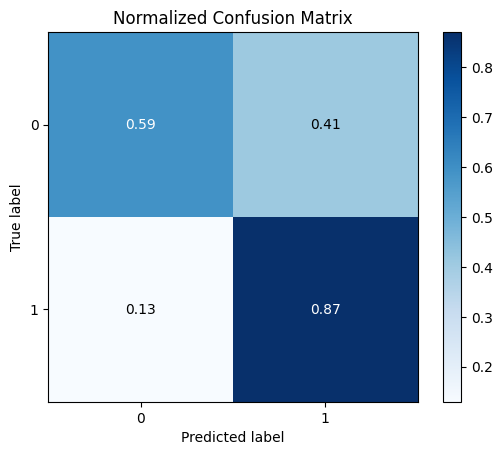

In [ ]:
# Modelo final
xgb = XGBClassifier(learning_rate=0.001 , n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)
xgb.fit(X_train_rus, y_train_rus)

# Fazendo a previsão
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Imprimindo a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# Plotando matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

## Conclusões

O modelo que empregamos para prever a evasão, foi o XGBoost que destacou-se com eficiência, atingindo uma performance de 87%. Isso implica que, em cada 100 clientes com intenções de cancelar o contrato, o modelo acertou 87 previsões.

Também observamos que há processos cruciais em projetos de Machine Learning, como a limpeza e preparação dos dados antes da aplicação de qualquer algoritmo ou modelo.

Ainda é importante perceber como pode ser otimizado e eficaz a análise ao empregar a inteligência artificial para resolver questões de negócios. E claro, que cada empresa enfrenta um cenário único, alguns mais simples, como este projeto, e outros mais complexos. No entanto, o elemento essencial que todas as empresas compartilham são os dados.




